# Compte rendu du TP2 : Interpolation Numérique 
<img src="tp2an.png">

## Exercice 1:

In [2]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [3]:
X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

=> Ce premier exercice nous montre la méthode de calcul du polynome d'interpolation de lagrange.


**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

On veut que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

On va définir une fonction dans l'intervalle [-1,1].

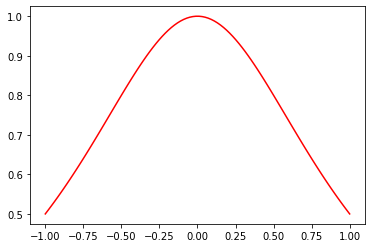

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1/(1+x*x)

a= -1; b= 1;
xp=np.linspace(a,b,100);
plt.plot(xp, f(xp), 'r');
plt.show()

Soit une fonction Lagrange(f, a, b, n) qui calcule le polynôme de dégrée ninterpolant la fonction f en n+1 points d’abscisse xi équidistants dans l’intervalle [a,b].

In [5]:
def Lagrange(f, a, b, n):
    x = np.linspace(a,b,n+1)
    X = np.poly1d([1,0])
    
    p=0
    for i in range (n+1):
        Li = 1
        for j in range (n+1):
            if(i==j):
                continue
            else:
                Li = Li*(X-x[j])/(x[i] - x[j])
        p=p+Li*f(x[i])
    return p

In [8]:
PL = [Lagrange (f,a,b,n) for n in [3,5,10]]

for n in range(3):
    print(PL[n])

            3        2
-5.551e-17 x - 0.45 x + 3.123e-17 x + 0.95
            5          4             3          2
-1.443e-15 x + 0.3535 x - 8.049e-16 x - 0.8484 x + 3.487e-16 x + 0.9949
         10             9          8             7          6
-0.1858 x  + 3.868e-13 x + 0.5946 x + 1.735e-12 x - 0.8988 x
              5          4             3          2
 + 1.576e-12 x + 0.9897 x + 6.269e-14 x - 0.9997 x + 2.849e-16 x + 1


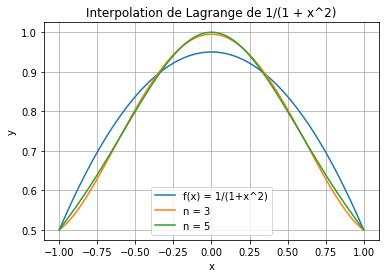

In [9]:
for n in range (3):
    plt.plot(xp, np.polyval(PL[n], xp))

plt.title("Interpolation de Lagrange de 1/(1 + x^2)")

leg = ["f(x) = 1/(1+x^2)"]
for n in [3,5,10]:
    leg=leg+["n = " + str(n)]
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg)
plt.grid()
plt.show()

On a utilisé cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[3:5:10]$.

## Exercice 2 :

### Phenomène de Runge

On va vérifier que sur  [−5,5]  le polynôme d'interpolation de Lagrange de la fonction  𝑓  définie par  𝑓(𝑥)=1/1+𝑥2.

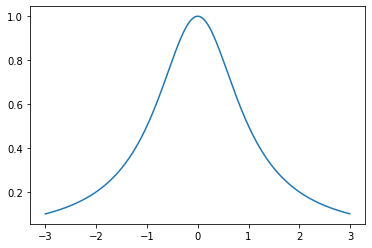

In [14]:
def  Runge(x):
    
    return  1/(1+x**2) 
a  =  -1. 
b  =  1. 
x  =  np.arange(-3,3,1e-2) 
y  =  Runge(x) 
plt.plot(x,y)

 Implémenter une fonction  Interp_Equi  qui prend en arguments d'entrée les valeurs a  et b  (qui définissent l'intervalle d'interpolation) ainsi que m de manière à retourner un vecteur  x de  m  points d'interpolations équirépartis sur x [a, b] .

In [32]:
def Interp_Equi(a,b,m):    
    return np.linspace(a,b,m)
Interp_Equi(-3,3,10)

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

 Implémenter une fonction Vandermonde qui prend en argumentsd'entrée un vecteur  de points d'interpolation et qui rend, en sortie, lamatrice de Vandermonde associée au système linéaire précédent.

In [35]:
def Vandermonde(x):    
    m = len(x)   
    M = np.zeros((m,m))    
    for i in range(m):       
        for j in range(m):          
            M[i,j] = x[i]**j    
    return M

 À l'aide de la fonction npl.solve, implémenter une fonctionMethode_directe qui prend en argument les points d'interpolations x  ainsiqu'une fonction f à interpoler et qui rend en sortie un vecteur  qui contientles coefficients du polynôme d'interpolation de f aux points x .

In [40]:
import numpy.linalg as npl
def  Methode_directe(x,f): 
    A  =  Vandermonde(x) 
    b  =  f(x) 
    return  npl.solve(A,b)

Grâce aux fonctions  PtsInterp_Equi  et  Methode_directe, tracer sur une même figure la fonction  Runge  sur l'intervalle polynôme d'interpolation pour  , [−3, 3] 5 10  et 15  ainsi que son  points d'interpolation.

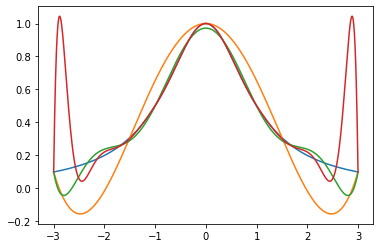

In [41]:
def  Pol_eval(a,x): 
    p  =  0 
    for  i  in  range(len(a)): 
        p  +=  a[i]*x**i 
    return  p 

x  =  np.linspace(-3,3,1000) 
plt.plot(x,Runge(x)) 
for  n  in  [5,10,15]: 
    x_interp  =  Interp_Equi(-3,3,n) 
    a  =  Methode_directe(x_interp,Runge)
    P  =  Pol_eval(a,x) 
    plt.plot(x,P)

Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

In [42]:
def Chebyshev(xmin,xmax,n=5):
    # This function calculates the n Chebyshev points and plots or returns them depending on ax
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    y = np.sin((2*ns-1)*np.pi/(2*n))
    plt.figure(figsize=(10,5))
    plt.ylim(-0.1,1.1)
    plt.xlim(-1.1,1.1)
    plt.plot(np.cos(np.linspace(0,np.pi)),np.sin(np.linspace(0,np.pi)),'k-')
    plt.plot([-2,2],[0,0],'k-')
    plt.plot([0,0],[-1,2],'k-')
    for i in range(len(y)):
        plt.plot([x[i],x[i]],[0,y[i]],'r-')
        plt.plot([0,x[i]],[0,y[i]],'r-')
    plt.plot(x,[0]*len(x),'bo',label='Chebyshev points')
    plt.plot(x,y,'ro')
    plt.xlabel('$x$')
    plt.title('n = '+str(n))
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    #y = np.sin((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2
def Chebyshev_points_histogram(n=50,nbins=20):
    xCheb=Chebyshev_points(-1,1,n)
    plt.figure()
    plt.hist(xCheb,bins=nbins,density=True)
    plt.grid(True)
    plt.show()

In [44]:
def T(n,x):
    # Recursive function that returns the n-th Chebyshev polynomial evaluated at x
    if n == 0:
        return x**0
    elif n == 1:
        return x
    else:
        return 2*x*T(n-1,x)-T(n-2,x)
    
def Chebyshev_Polynomials(n=2, Flag_All_Tn=False):
    # This function plots the first n Chebyshev polynomials
    x = np.linspace(-1,1,1000)
    plt.figure(figsize=(10,5))
    plt.xlim(-1, 1)
    plt.ylim(-1.1, 1.1)
    if Flag_All_Tn:
        for i in np.arange(n+1):
            y = T(i,x)
            plt.plot(x,y,label='$T_{'+str(i)+'}(x)$')
    else:
        y = T(n,x)
        plt.plot(x,y,label='$T_{'+str(n)+'}(x)$')
    #    plt.title('$T_${:}$(x)$'.format(n))
    plt.legend(loc='right')
    plt.grid(True)
    plt.xlabel('$x$')
    plt.show()

In [46]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

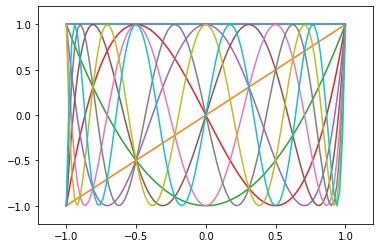

In [47]:
x = np.linspace(-1, 1, 100)

pt.xlim([-1.2, 1.2])
pt.ylim([-1.2, 1.2])

for k in range(10): # crank up
    pt.plot(x, np.cos(k*np.arccos(x)))

### Exercice 3 :

On va écrire une fonction Methode_Newton qui implémente la méthodeprécédente avec en arguments d'entrée un vecteur de points d'interpolation et un vecteur x de points d'abscisse. Cette fonction returnerala matrice N dont chaque colonne correspond au vecteur ni.

In [49]:
def Methode_Newton(x_interp,x):  
    m = len(x_interp)   
    n = len(x)  
    N = np.ones((n,m))   
    for i in range(m):     
        for j in range(i):         
            N[:,i] = N[:,i]*(x - x_interp[j])    
    return N

On va écrire une fonction Coeff_Newton qui permet de calculer les coefficients  en résolvant le système triangulaire inférieur par un algorithme de descente. Cette fonction prendra en entrée le vecteur des points d'interpolation ainsi que la fonction f à interpoler et rendra le vecteur z des coefficients.

In [50]:
def  Coeff_Newton(x_interp,f): 
    m  =  len(x_interp)
    T  =  np.zeros((m,m)) 
    for  i  in  range(m): 
        for  j  in  range(m): 
            if  j  ==  0: 
                T[i,j] =  1 
            elif  j<=i: 
                T[i,j] =  T[i,j-1]*(x_interp[i]  -  x_interp[j-1]) 
    z  =  npl.solve(T,f(x_interp)) 
    return  z

On va tracer ensuite sur une même figure la fonction  Runge  sur l'intervalle  ainsi que son polynôme d'interpolation obtenue avec la méthode de Newton pour  , 5 10  et 15  points d'interpolation.

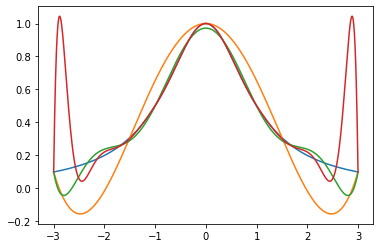

In [52]:
x  =  np.linspace(-3,3,1000) 
plt.plot(x,Runge(x)) 
for  n  in  [5,10,15]: 
    x_interp  =  Interp_Equi(-3,3,n) 
    z  =  Coeff_Newton(x_interp,Runge) 
    N  =  Methode_Newton(x_interp,x) 
    P  =  N.dot(z) 
    plt.plot(x,P)